# Image Classification Using Convolutional Neural Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To obtain the same results for each run, use random seeds in the keras and make the tensorflow operation decisive.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## Load Fashion MNIST Data

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## Create Convolutional Neural Network

In [4]:
model = keras.Sequential()

In [5]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

In [6]:
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [8]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [10]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Model Compilation and Training

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.5070 - accuracy: 0.8186 - val_loss: 0.3148 - val_accuracy: 0.8824
Epoch 2/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3363 - accuracy: 0.8792 - val_loss: 0.2729 - val_accuracy: 0.8967
Epoch 3/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2899 - accuracy: 0.8966 - val_loss: 0.2467 - val_accuracy: 0.9091
Epoch 4/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2573 - accuracy: 0.9059 - val_loss: 0.2339 - val_accuracy: 0.9117
Epoch 5/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2343 - accuracy: 0.9138 - val_loss: 0.2290 - val_accuracy: 0.9129
Epoch 6/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2143 - accuracy: 0.9219 - val_loss: 0.2208 - val_accuracy: 0.9187
Epoch 7/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.1986 - accuracy: 0.9269 - val_loss: 0.2203 -

In [13]:
import matplotlib.pyplot as plt

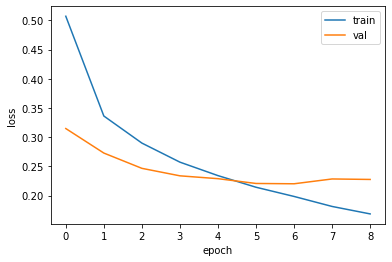

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.2203 - accuracy: 0.9193


[0.22028160095214844, 0.9192500114440918]

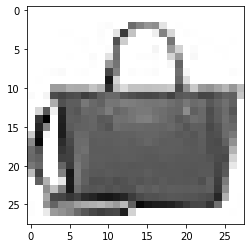

In [16]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [17]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 227ms/step
[[1.27339525e-17 3.37740763e-25 5.92539927e-21 8.18410378e-19
  2.97688207e-17 1.75777660e-13 1.03291738e-14 1.14960073e-17
  1.00000000e+00 2.97087955e-18]]


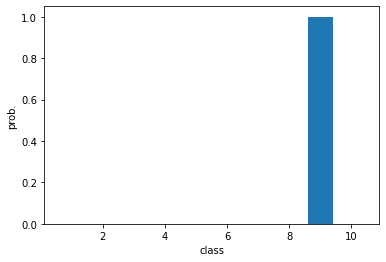

In [18]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [19]:
classes = ['T-shirt', 'Pants', 'Sweater', 'Dress', 'Coat',
           'Sandal', 'Shirts', 'Sneakers', 'Bag', 'Ankle Boots']

In [20]:
import numpy as np
print(classes[np.argmax(preds)])

Bag


In [21]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [22]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 4ms/step - loss: 0.2430 - accuracy: 0.9132


[0.24304306507110596, 0.9132000207901001]